In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read and Inspect the data

In [4]:
path = '../data/jamb_survey_data_with_result.csv'
data = pd.read_csv(path)
print (data.shape)
data.head(2)

(2000, 19)


,Age,Gender,Location,Parental Occupation,Study Hours,Previously Written JAMB,WAEC English Score,WAEC Maths Score,Internet Access,Understanding of Subjects,Confidence in JAMB Success,CBT Experience,Feelings about CBT,Learning Materials Availability,Educational Technology Usage,Support for Exam Preparation,Suggestions for School Improvement,Adequate JAMB Preparation,Result
0,17,Female,Epe (Public),Artisan,1-3 hours,No,74,76,Yes,Good,Not confident,No,Uncomfortable,Excellent,Always,"Extra lessons, More past questions",More teachers,No,Fail
1,17,Female,Epe (Public),Artisan,1-3 hours,Yes,88,96,Yes,Poor,Confident,Yes,Uncomfortable,Excellent,Never,Counseling,More teachers,Yes,Pass


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 2000 non-null   int64 
 1   Gender                              2000 non-null   object
 2   Location                            2000 non-null   object
 3   Parental Occupation                 2000 non-null   object
 4   Study Hours                         2000 non-null   object
 5   Previously Written JAMB             2000 non-null   object
 6   WAEC English Score                  2000 non-null   int64 
 7   WAEC Maths Score                    2000 non-null   int64 
 8   Internet Access                     2000 non-null   object
 9   Understanding of Subjects           2000 non-null   object
 10  Confidence in JAMB Success          2000 non-null   object
 11  CBT Experience                      2000 non-null   obje

In [6]:
cols = data.columns

for col in cols:
    print (f"******************** data for: {col} *********************************\n{data[col].value_counts()}\n*****************************************************")

******************** data for: Age *********************************
20    418
19    416
17    403
16    392
18    371
Name: Age, dtype: int64
*****************************************************
******************** data for: Gender *********************************
Female    1009
Male       991
Name: Gender, dtype: int64
*****************************************************
******************** data for: Location *********************************
Ikorodu (Public)             429
Epe (Public)                 413
Victoria Island (Private)    406
Lekki (Private)              379
Others                       373
Name: Location, dtype: int64
*****************************************************
******************** data for: Parental Occupation *********************************
Trader            416
Civil servant     408
Business owner    405
Artisan           395
Teacher           376
Name: Parental Occupation, dtype: int64
*****************************************************
*********

In [7]:
cols

Index(['Age', 'Gender', 'Location', 'Parental Occupation', 'Study Hours',
       'Previously Written JAMB', 'WAEC English Score', 'WAEC Maths Score',
       'Internet Access', 'Understanding of Subjects',
       'Confidence in JAMB Success', 'CBT Experience', 'Feelings about CBT',
       'Learning Materials Availability', 'Educational Technology Usage',
       'Support for Exam Preparation', 'Suggestions for School Improvement',
       'Adequate JAMB Preparation', 'Result'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='count'>

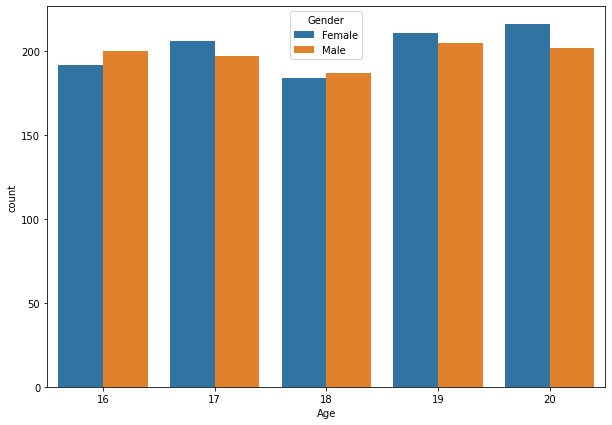

In [8]:
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='Age', hue='Gender')
# plt.legend()

<AxesSubplot:xlabel='count', ylabel='Gender'>

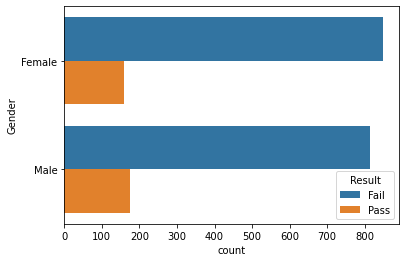

In [9]:
sns.countplot(data=data, y='Gender', hue='Result')

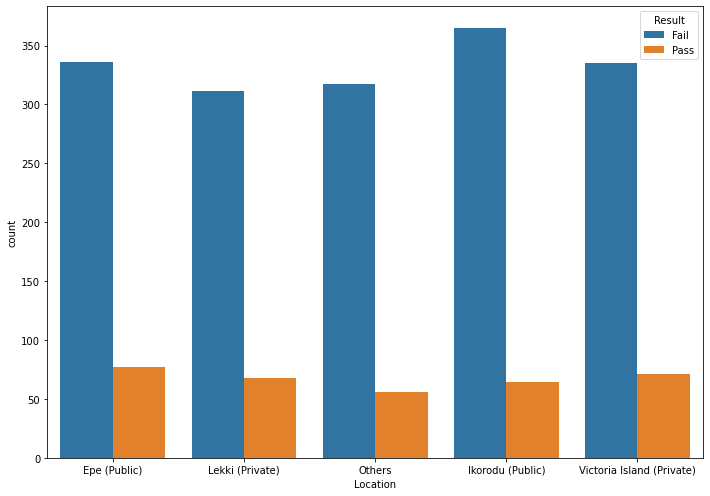

In [10]:
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='Location', hue='Result')
plt.tight_layout()

## 2. Text Analytics

`All other advanced analytics can be found in the powerbi dashboard`

## 3. Modelling

In [11]:
# Selecting only relevant columns for model prediction
subset = data[['Location', 'Parental Occupation', 
      'Study Hours', 'Internet Access', 
      'Understanding of Subjects', 'Adequate JAMB Preparation', 'Result']]

subset.head(2)

,Location,Parental Occupation,Study Hours,Internet Access,Understanding of Subjects,Adequate JAMB Preparation,Result
0,Epe (Public),Artisan,1-3 hours,Yes,Good,No,Fail
1,Epe (Public),Artisan,1-3 hours,Yes,Poor,Yes,Pass


In [12]:
loction_map = {
    'Ikorodu (Public)': 1,
    'Epe (Public)': 1,
    'Victoria Island (Private)':2,
    'Lekki (Private)': 2, 
    'Others': 0}

study_map = {'Less than 1 hour': 0,
             '1-3 hours':1,
             '3-5 hours ':2,
             'More than 5 hours': 3}

understanding_map = {
    'Poor':0,
    'Average': 1,
    'Good': 2,
    'Excellent':3 
}

parent_occupation_map = {
    'Trader':0,
    'Civil servant': 3,
    'Business owner':2,
    'Artisan': 1,
    'Teacher':4}

internet_map = {
    'Yes':1,
    'No':0
}

jamb_prep_map = {
    'Yes':1,
    'No':0
}
label_map = {
    'Fail':0,
    'Pass':1
}




In [13]:
# subset.loc[:, 2] = 
# subset['Study Hours'].map(study_map)
# subset.loc[:, ['Understanding of Subjects']] = subset['Understanding of Subjects'].map(understanding_map)
subset.loc[:, 'Location'] = subset['Location'].map(loction_map)
subset.loc[:, 'Understanding of Subjects'] = subset['Understanding of Subjects'].map(understanding_map)
subset.loc[:, 'Parental Occupation'] = subset['Parental Occupation'].map(parent_occupation_map)
subset.loc[:, 'Internet Access'] = subset['Internet Access'].map(internet_map)
subset.loc[:, 'Study Hours'] = subset['Study Hours'].map(study_map)
subset.loc[:, 'Adequate JAMB Preparation'] = subset['Adequate JAMB Preparation'].map(jamb_prep_map)
subset.loc[:, 'Result'] = subset['Result'].map(label_map)


subset

c:\Users\user\anaconda3\envs\ml-env\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
c:\Users\user\anaconda3\envs\ml-env\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Location,Parental Occupation,Study Hours,Internet Access,Understanding of Subjects,Adequate JAMB Preparation,Result
0,1,1,1.0,1,2,0,0
1,1,1,1.0,1,0,1,1
2,2,3,1.0,0,3,0,0
3,2,2,3.0,0,3,1,0
4,0,0,1.0,1,1,0,0
...,...,...,...,...,...,...,...
1995,2,4,3.0,1,0,0,1
1996,1,0,1.0,0,3,1,0
1997,0,1,1.0,1,1,1,1
1998,2,0,0.0,1,2,0,0


In [14]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

In [15]:
subset.columns

Index(['Location', 'Parental Occupation', 'Study Hours', 'Internet Access',
       'Understanding of Subjects', 'Adequate JAMB Preparation', 'Result'],
      dtype='object')

In [16]:
inputs = subset.loc[:, ['Location', 'Parental Occupation', 'Study Hours', 'Internet Access',
       'Understanding of Subjects', 'Adequate JAMB Preparation']]
target = subset.loc[:,'Result']

inputs.shape, target.shape

((2000, 6), (2000,))

In [17]:
TRAIN_RATIO = 0.75
VAL_RATIO = 0.15
TEST_RATIO = 0.10

train_x, test_x, train_y, test_y = train_test_split(inputs, target, test_size=1-TRAIN_RATIO)
val_x, test_x, val_y, test_y = train_test_split (test_x, test_y, test_size= TEST_RATIO/(TEST_RATIO+VAL_RATIO), shuffle=False)
print (f"TRAIN_SIZE: {train_x.shape, train_y.shape}, VAL_SIZE: {val_x.shape, val_y.shape},TEST_SIZE: {test_x.shape, test_y.shape}, \n  TOTAL_SHAPE: {train_x.shape[0]+val_x.shape[0]+test_x.shape[0]}, ORIGINAL_SHAPE: {subset.shape[0]}")

TRAIN_SIZE: ((1500, 6), (1500,)), VAL_SIZE: ((300, 6), (300,)),TEST_SIZE: ((200, 6), (200,)), 
  TOTAL_SHAPE: 2000, ORIGINAL_SHAPE: 2000


In [18]:
lgb_model = lgb.LGBMClassifier(
    colsample_bytree=0.9,       
    subsample=0.9,             
    num_leaves=50,             
    learning_rate=0.05,       
    reg_alpha=0.1,      
    reg_lambda=0.01,   
    n_estimators=5000,   
    random_state=123,
    verbose=-1
)

evalset = [(train_x, train_y), (test_x, test_y)]
lgb_model.fit(
    X=train_x, y=train_y, 
    eval_set=evalset, 
    early_stopping_rounds=20,  # Stop if no improvement for 20 rounds
    eval_metric='binary_logloss',  # Focus on binary log loss for evaluation
    verbose=True               # To display training progress
)


[1]	training's binary_logloss: 0.449664	valid_1's binary_logloss: 0.431967
[2]	training's binary_logloss: 0.448056	valid_1's binary_logloss: 0.431965
[3]	training's binary_logloss: 0.445882	valid_1's binary_logloss: 0.432394
[4]	training's binary_logloss: 0.444221	valid_1's binary_logloss: 0.433407
[5]	training's binary_logloss: 0.442451	valid_1's binary_logloss: 0.433664
[6]	training's binary_logloss: 0.440827	valid_1's binary_logloss: 0.434304
[7]	training's binary_logloss: 0.438769	valid_1's binary_logloss: 0.433885
[8]	training's binary_logloss: 0.437461	valid_1's binary_logloss: 0.433779
[9]	training's binary_logloss: 0.436511	valid_1's binary_logloss: 0.433294
[10]	training's binary_logloss: 0.435109	valid_1's binary_logloss: 0.433827
[11]	training's binary_logloss: 0.433465	valid_1's binary_logloss: 0.433392
[12]	training's binary_logloss: 0.432161	valid_1's binary_logloss: 0.43346
[13]	training's binary_logloss: 0.430652	valid_1's binary_logloss: 0.434182
[14]	training's binary

c:\Users\user\anaconda3\envs\ml-env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\user\anaconda3\envs\ml-env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05, n_estimators=5000,
               num_leaves=50, random_state=123, reg_alpha=0.1, reg_lambda=0.01,
               subsample=0.9, verbose=-1)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

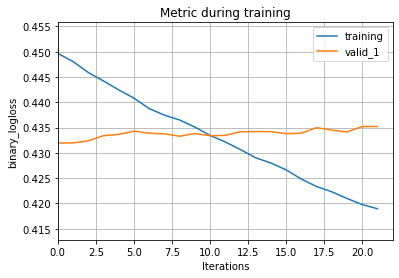

In [19]:
lgb.plot_metric(lgb_model, 'binary_logloss')

In [20]:
# check prediction on test data
pred = lgb_model.predict(test_x)
f1_score(test_y, pred, average='micro')

0.845

In [21]:
import joblib
# save model
joblib.dump(lgb_model, '../models/lgb_model.pkl')

['../models/lgb_model.pkl']

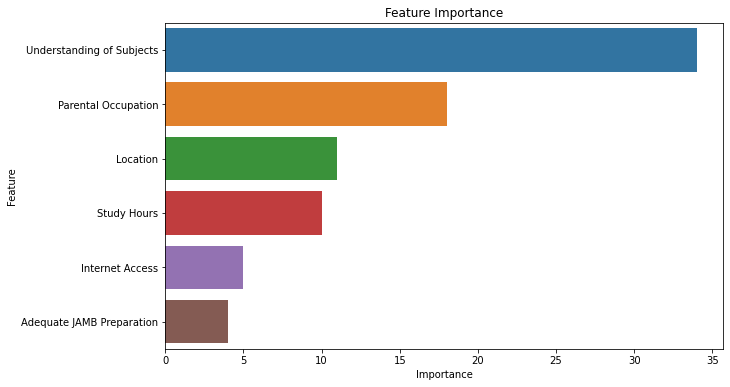

In [22]:
feature_importance = lgb_model.feature_importances_

# Get feature names (if you used a DataFrame)
feature_names = train_x.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
